# Exercise 1.7 | Creating Network Visualizations

### Contents
##### 1. Import Libraries
##### 2. Importing relationship dataset
##### 3. Create a network object
##### 4. Create a static network graph
##### 5. Use pyvis to create an interactive network graph
##### 6. Apply the Leiden algorthim & create new graph
##### 7. Obervations & Conclusions
##### 8. Degree, Closeness & Betweenness Centrality measures

##### 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import os
import matplotlib.pyplot as plt
from pyvis.network import Network
import seaborn as sns
import pyvis

##### 2. Importing relationship dataset

In [2]:
# Import relationship data

relationship_df = pd.read_csv('relationship_dataframe1.csv', index_col = 0)

In [3]:
relationship_df

,country,value
sentence,,
1,France,1
1,Italy,1
1,Russia,4
1,Germany,2
1,Bulgaria,1
...,...,...
21,Pakistan,1
22,Russia,1
23,Vietnam,2


In [4]:
# Reset index and rename columns
relationship_df.reset_index(inplace=True)
relationship_df.rename(columns={'index': 'sentence'}, inplace=True)

In [5]:
relationship_df

,sentence,country,value
0,1,France,1
1,1,Italy,1
2,1,Russia,4
3,1,Germany,2
4,1,Bulgaria,1
...,...,...,...
95,21,Pakistan,1
96,22,Russia,1
97,23,Vietnam,2
98,24,Lebanon,1


##### 3. Create a network object

In [6]:
# Create a directed graph
G = nx.DiGraph()

In [7]:
# Iterate over each row in the DataFrame
for index, row in relationship_df.iterrows():
    # Extract source, target, and weight from the DataFrame
    source = row['sentence']
    target = row['country']
    weight = row['value']
    
    # Add edges to the graph
    G.add_edge(source, target, weight=weight)

##### 4. Create a static network graph

In [8]:
# 'Create a static network graph using only NetworkX.'

# Set node positions
pos = nx.spring_layout(G)

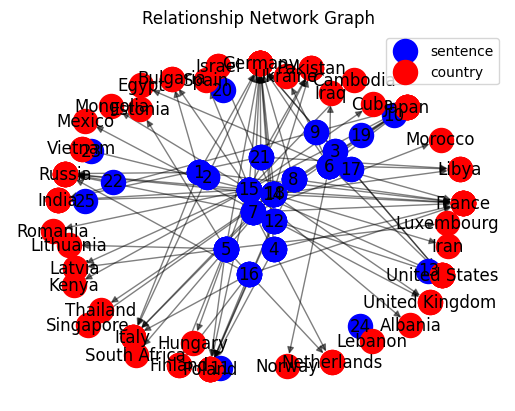

In [9]:
# Draw nodes
nx.draw_networkx_nodes(G, pos, nodelist=relationship_df['sentence'], node_color='b', label='sentence')
nx.draw_networkx_nodes(G, pos, nodelist=relationship_df['country'], node_color='r', label='country')

# Draw edges
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)

# Draw labels
nx.draw_networkx_labels(G, pos)

# Add legend
plt.legend()

# Show the plot
plt.title('Relationship Network Graph')
plt.axis('off')
plt.show()

##### 5. Use pyvis to create an interactive network graph

In [10]:
# 'Switch to pyvis, build an interactive network graph from your network object, and save it as an HTML file'

# Create a Pyvis network object
net = Network()

In [11]:
# Add nodes from the networkx graph
for node in G.nodes:
    net.add_node(node)

# Add edges from the networkx graph
for edge in G.edges(data=True):
    source, target, weight = edge
    net.add_edge(source, target, value=weight['weight'])

In [12]:
# save a visual of this graph as an html 
net.show("interactive_network.html")

##### 6. Apply the Leiden algorthim & create new graph

In [13]:
# 'Apply the Leiden algorithm to detect any communities within the countries.'

import leidenalg as la
import community as community_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [14]:
import igraph as ig

# Convert the networkx graph to an igraph graph
G_igraph = ig.Graph.Adjacency((nx.to_numpy_array(G) > 0).tolist())

In [15]:
# Apply the Leiden algorithm
partition = la.find_partition(G_igraph, la.ModularityVertexPartition)

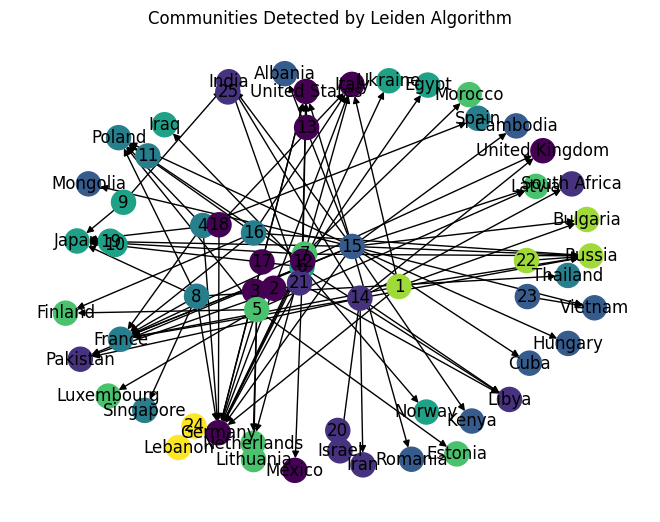

In [16]:
# Visualize the communities
pos = nx.spring_layout(G)
cmap = cm.get_cmap('viridis', max(partition.membership) + 1)
nx.draw(G, pos, node_color=[cmap(membership) for membership in partition.membership], with_labels=True)

# Show the plot
plt.title('Communities Detected by Leiden Algorithm')
plt.show()

##### 7. Obervations & Conclusions

In [17]:
# Create a Pyvis network object
net = Network()

# Add nodes from the networkx graph with labels
for node, community_id in zip(G.nodes(), partition.membership):
    if node in relationship_df['country'].values:
        net.add_node(node, title=node, color=cmap(community_id), label=node)
    else:
        sentence_label = relationship_df.loc[relationship_df['sentence'] == node, 'country'].values[0]
        net.add_node(node, title=f"{node} ({sentence_label})", color=cmap(community_id), label=node)

# Add edges from the networkx graph
for source, target in G.edges():
    net.add_edge(source, target)

# Save the network as an HTML file
net.show("interactive_network_with_communities.html")

In [20]:
# Observations: - I notice the most common countries in the dataset are positioned in the middle (Germany, USA, France, Russia, and Japan).
# - the dots connecting the countries would have had more use to our analysis if they had a topic or event attached to them. It would have allowed us to make more of the
# information we can see.

##### 8. Degree, Closeness & Betweenness Centrality measures

In [21]:
# Compute degree centrality
degree_centrality = nx.degree_centrality(G)

In [23]:
degree_centrality

{1: 0.07936507936507936,
 'France': 0.12698412698412698,
 'Italy': 0.07936507936507936,
 'Russia': 0.09523809523809523,
 'Germany': 0.20634920634920634,
 'Bulgaria': 0.031746031746031744,
 2: 0.031746031746031744,
 3: 0.031746031746031744,
 'United States': 0.09523809523809523,
 4: 0.06349206349206349,
 'Spain': 0.015873015873015872,
 'Poland': 0.1111111111111111,
 5: 0.12698412698412698,
 'Estonia': 0.015873015873015872,
 'Latvia': 0.031746031746031744,
 'Lithuania': 0.015873015873015872,
 'Finland': 0.031746031746031744,
 'Netherlands': 0.031746031746031744,
 'Luxembourg': 0.015873015873015872,
 6: 0.14285714285714285,
 'Norway': 0.015873015873015872,
 'Ukraine': 0.015873015873015872,
 'Libya': 0.047619047619047616,
 'Egypt': 0.015873015873015872,
 'Iraq': 0.015873015873015872,
 'Japan': 0.12698412698412698,
 7: 0.1111111111111111,
 'Morocco': 0.015873015873015872,
 8: 0.09523809523809523,
 'Thailand': 0.015873015873015872,
 'Singapore': 0.015873015873015872,
 9: 0.031746031746031744

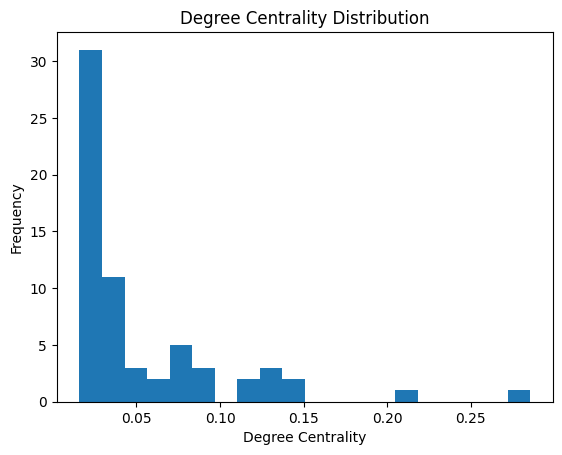

In [22]:
# Plot degree centrality
plt.hist(list(degree_centrality.values()), bins=20)
plt.title('Degree Centrality Distribution')
plt.xlabel('Degree Centrality')
plt.ylabel('Frequency')
plt.show()

In [32]:
#observations: 
#'Germany' has the highest degree centrality, indicating it is the most connected node in the network.
# Nodes like 'Spain', 'Estonia', 'Norway', etc., have low degree centrality, suggesting they are less influential.
# Many nodes have similar degree centrality values, indicating similar levels of connectivity and potential roles in the network.

In [25]:
# Compute closeness centrality
closeness_centrality = nx.closeness_centrality(G)

In [26]:
closeness_centrality

{1: 0.0,
 'France': 0.12698412698412698,
 'Italy': 0.07936507936507936,
 'Russia': 0.09523809523809523,
 'Germany': 0.20634920634920634,
 'Bulgaria': 0.031746031746031744,
 2: 0.0,
 3: 0.0,
 'United States': 0.09523809523809523,
 4: 0.0,
 'Spain': 0.015873015873015872,
 'Poland': 0.1111111111111111,
 5: 0.0,
 'Estonia': 0.015873015873015872,
 'Latvia': 0.031746031746031744,
 'Lithuania': 0.015873015873015872,
 'Finland': 0.031746031746031744,
 'Netherlands': 0.031746031746031744,
 'Luxembourg': 0.015873015873015872,
 6: 0.0,
 'Norway': 0.015873015873015872,
 'Ukraine': 0.015873015873015872,
 'Libya': 0.047619047619047616,
 'Egypt': 0.015873015873015872,
 'Iraq': 0.015873015873015872,
 'Japan': 0.12698412698412698,
 7: 0.0,
 'Morocco': 0.015873015873015872,
 8: 0.0,
 'Thailand': 0.015873015873015872,
 'Singapore': 0.015873015873015872,
 9: 0.0,
 'India': 0.07936507936507936,
 10: 0.0,
 11: 0.0,
 12: 0.0,
 'United Kingdom': 0.031746031746031744,
 'Mexico': 0.015873015873015872,
 13: 0.0,

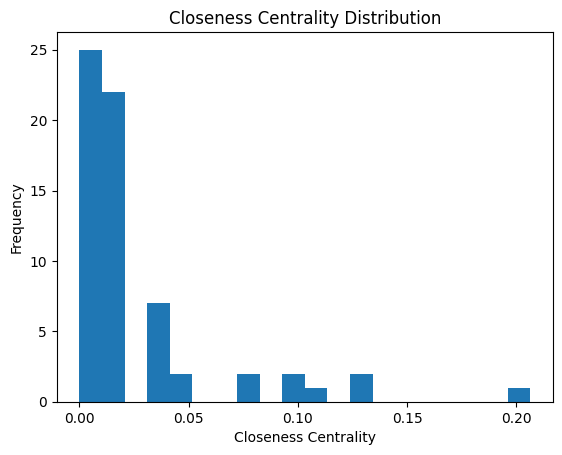

In [27]:
# Plot closeness centrality
plt.hist(list(closeness_centrality.values()), bins=20)
plt.title('Closeness Centrality Distribution')
plt.xlabel('Closeness Centrality')
plt.ylabel('Frequency')
plt.show()

In [33]:
# oberservations:
# Some points, including 'France', 'Italy', 'Russia', 'Germany', 'United States', etc., have non-zero closeness centrality, indicating they are relatively close to other nodes in the network.
# Many have similar closeness centrality values, indicating they are at similar distances from other points in the network. This includes 'Spain', 'Poland', 'Japan', 'India', 'Pakistan', etc., each with a closeness centrality of approximately 0.0159.

In [29]:
# Compute betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)

In [30]:
betweenness_centrality

{1: 0.0,
 'France': 0.0,
 'Italy': 0.0,
 'Russia': 0.0,
 'Germany': 0.0,
 'Bulgaria': 0.0,
 2: 0.0,
 3: 0.0,
 'United States': 0.0,
 4: 0.0,
 'Spain': 0.0,
 'Poland': 0.0,
 5: 0.0,
 'Estonia': 0.0,
 'Latvia': 0.0,
 'Lithuania': 0.0,
 'Finland': 0.0,
 'Netherlands': 0.0,
 'Luxembourg': 0.0,
 6: 0.0,
 'Norway': 0.0,
 'Ukraine': 0.0,
 'Libya': 0.0,
 'Egypt': 0.0,
 'Iraq': 0.0,
 'Japan': 0.0,
 7: 0.0,
 'Morocco': 0.0,
 8: 0.0,
 'Thailand': 0.0,
 'Singapore': 0.0,
 9: 0.0,
 'India': 0.0,
 10: 0.0,
 11: 0.0,
 12: 0.0,
 'United Kingdom': 0.0,
 'Mexico': 0.0,
 13: 0.0,
 14: 0.0,
 'Pakistan': 0.0,
 'Israel': 0.0,
 'South Africa': 0.0,
 'Iran': 0.0,
 15: 0.0,
 'Cambodia': 0.0,
 'Kenya': 0.0,
 'Albania': 0.0,
 'Romania': 0.0,
 'Hungary': 0.0,
 'Mongolia': 0.0,
 'Cuba': 0.0,
 'Vietnam': 0.0,
 16: 0.0,
 17: 0.0,
 18: 0.0,
 19: 0.0,
 20: 0.0,
 21: 0.0,
 22: 0.0,
 23: 0.0,
 24: 0.0,
 'Lebanon': 0.0,
 25: 0.0}

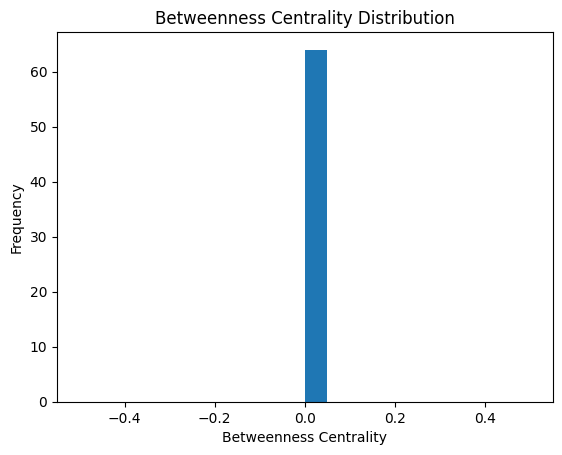

In [31]:
# Plot betweenness centrality
plt.hist(list(betweenness_centrality.values()), bins=20)
plt.title('Betweenness Centrality Distribution')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Frequency')
plt.show()

In [35]:
#obersations:
# most of the network have a betweenness centrality of 0, indicating that none of the points serve as critical in connecting other points in the graph
# every point has an equal betweenness centrality value of 0, suggesting that there is no point that should be weighed as important in measuring interactions between the points
# the lack of betweenness centrality values implies that the network lacks points that play a significant role in communication or influence